satisfaction_score    0
dtype: int64


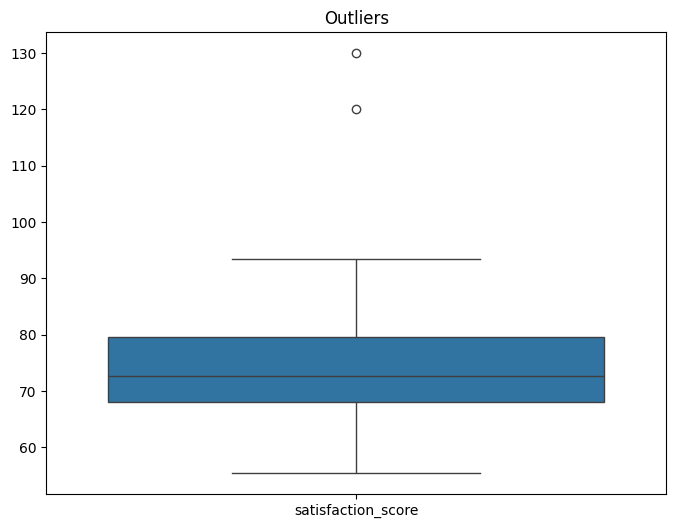

Outliers by IQR:     satisfaction_score
48               120.0
49               130.0
Outliers by Z-score:     satisfaction_score   z_score
48               120.0  3.305783
49               130.0  4.040877


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import mstats

data = pd.read_csv('lab2_5.csv')

# check for null values
print(data.isnull().sum())

# Boxplot for identifying outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data)
plt.title('Outliers')
plt.show()

# Using IQR method
Q1 = data['satisfaction_score'].quantile(.25)
Q3 = data['satisfaction_score'].quantile(.75)
IQR = Q3 - Q1
outliers_by_iqr = data[(data['satisfaction_score'] < (Q1 - 1.5 * IQR)) | (data['satisfaction_score'] > (Q3 + 1.5 * IQR))]

# Using Z-score method
data['z_score'] = np.abs(stats.zscore(data['satisfaction_score']))
outliers_by_zscore = data[data['z_score'] > 3]

print("Outliers by IQR:", outliers_by_iqr)
print("Outliers by Z-score:", outliers_by_zscore)


In [2]:
# trimming data
print("Mean of Satisfaction Score with Outliers:\n", data.mean())
print("\nMedian of Satisfaction Score with Outliers:\n", data.median())
print("\nStandard Deviation of Satisfaction Score with Outliers:\n", data.std())

trimmed_data = data[(data['satisfaction_score'] > (Q1 - 1.5 * IQR)) & (data['satisfaction_score'] < (Q3 + 1.5 * IQR))]

print("\n----------------- Outliers Removed -----------------\n")

print("Mean of Satisfaction Score without Outliers:\n", trimmed_data.mean())
print("\nMedian of Satisfaction Score without Outliers:\n", trimmed_data.median())
print("\nStandard Deviation of Satisfaction Score without Outliers:\n", trimmed_data.std())

Mean of Satisfaction Score with Outliers:
 satisfaction_score    75.029145
z_score                0.679784
dtype: float64

Median of Satisfaction Score with Outliers:
 satisfaction_score    72.700434
z_score                0.444061
dtype: float64

Standard Deviation of Satisfaction Score with Outliers:
 satisfaction_score    13.741806
z_score                0.740858
dtype: float64

----------------- Outliers Removed -----------------

Mean of Satisfaction Score without Outliers:
 satisfaction_score    72.947026
z_score                0.555053
dtype: float64

Median of Satisfaction Score without Outliers:
 satisfaction_score    72.658548
z_score                0.429573
dtype: float64

Standard Deviation of Satisfaction Score without Outliers:
 satisfaction_score    9.226190
z_score               0.411408
dtype: float64


Text(0.5, 1.0, 'Log Transformed Satisfaction Scores')

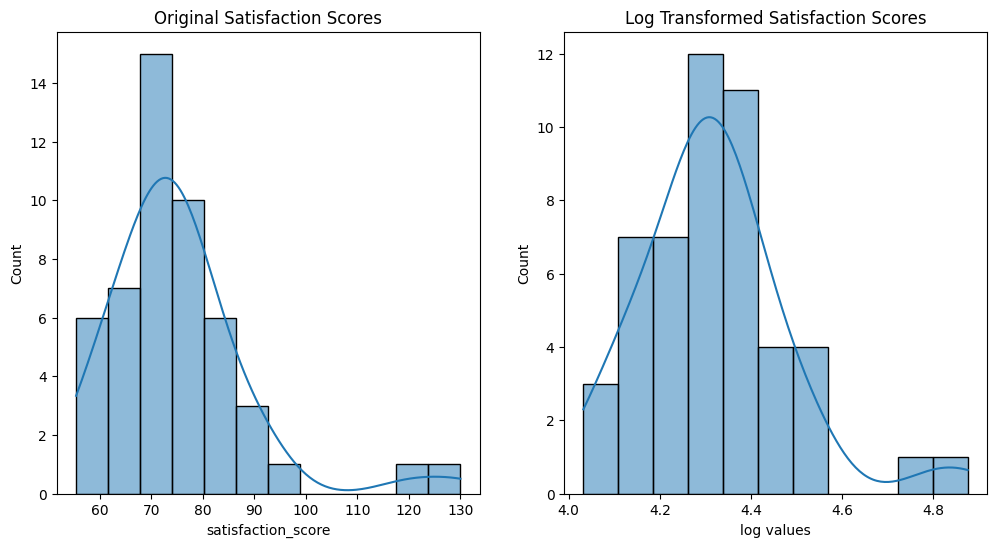

In [3]:
# applying log transformation

data['log values'] = np.log(data['satisfaction_score'] + 1)

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(data['satisfaction_score'], kde=True)
plt.title('Original Satisfaction Scores')

plt.subplot(1,2,2)
sns.histplot(data['log values'], kde=True)
plt.title('Log Transformed Satisfaction Scores')

Text(0.5, 1.0, 'Winsorized Data')

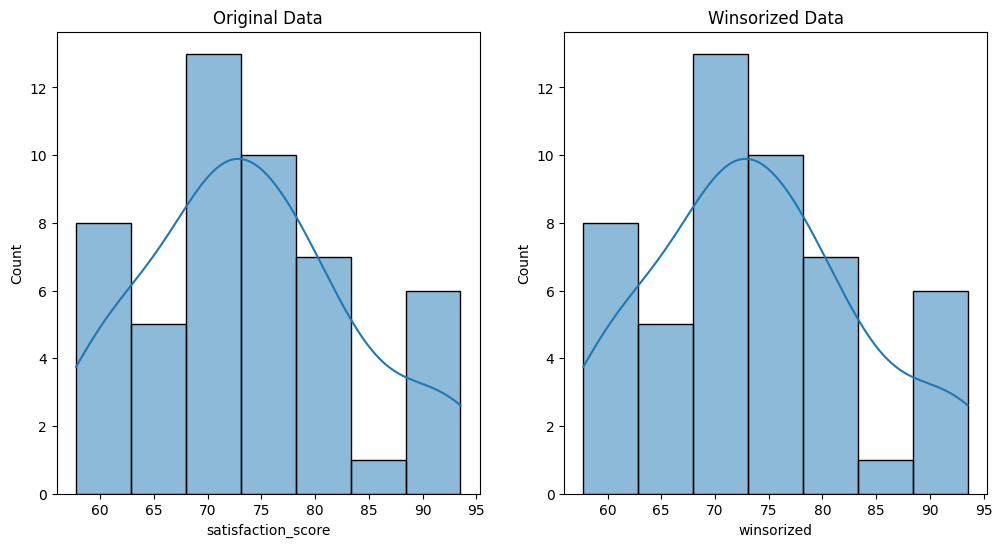

In [4]:
# Winsorizing data

data['winsorized'] = mstats.winsorize(data['satisfaction_score'], limits=[0.05, 0.05])

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.histplot(data['satisfaction_score'], kde=True)
plt.title('Original Data')

plt.subplot(1,2,2)
sns.histplot(data['winsorized'], kde=True)
plt.title('Winsorized Data')